In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from pandas.tools.plotting import table


In [3]:
players = pd.read_csv('player_data.csv')
seasons = pd.read_csv('Seasons_stats.csv')
p = players.groupby('college').count()
playerByCollege = p.sort_values(by = 'name', ascending=False)
top20 = playerByCollege['name'].head(20)



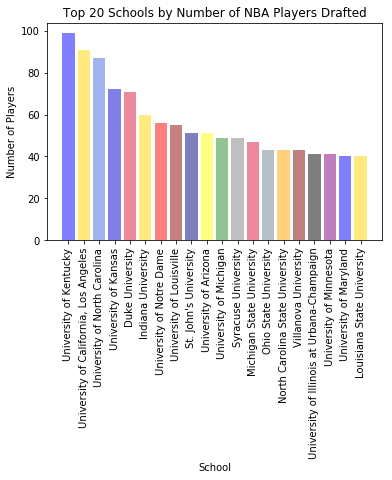

C:\Users\Mikey O\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


college
University of Kentucky                   99
University of California, Los Angeles    91
University of North Carolina             87
University of Kansas                     72
Duke University                          71
Name: name, dtype: int64

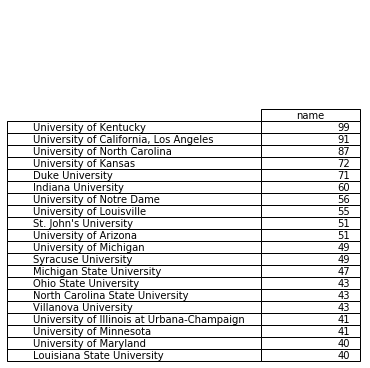

In [37]:
y_pos = np.arange(20)
plt.xticks(y_pos, top20.index)
plt.xlabel('School')
plt.ylabel('Number of Players')
plt.title('Top 20 Schools by Number of NBA Players Drafted')
plt.bar(y_pos, top20, align='center', alpha=0.5,
        color = ['blue',
                 'gold',
                 'royalblue',
                 'mediumblue',
                 'crimson',
                 'gold',
                 'red',
                 'darkred',
                 'navy',
                 'yellow',
                 'forestgreen',
                 'grey',
                 'crimson',
                 'slategrey',
                 'orange',
                 'maroon',
                 'black',
                 'purple'])
plt.xticks(rotation=90)
plt.savefig('images/Top 20 Schools by Number of NBA Players Drafted', dpi = 100, bbox_inches='tight')
plt.show()


ax = plt.subplot(235, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, top20)  # where df is your data frame

plt.savefig('images/top20school.png', dpi = 100, bbox_inches='tight')
top20.head()

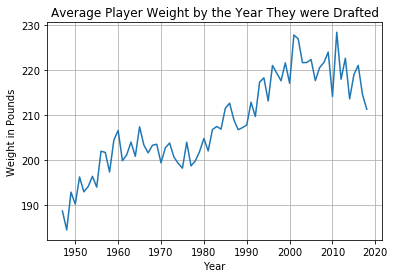

In [9]:
p = players.groupby('year_start').mean()
weightByYear = p['weight']
plt.plot(weightByYear.index, weightByYear)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Weight in Pounds')
plt.title('Average Player Weight by the Year They were Drafted')
plt.savefig('images/Average Player Weight by the Year They were Drafted', dpi = 100, bbox_inches='tight')

In [10]:
s =seasons.groupby(['Player', 'Year']).mean()

players[["feet","inches"]]=players["height"].str.split('-',expand=True)
players["feet"] = pd.to_numeric(players["feet"])
players["inches"] = pd.to_numeric(players["inches"])
players['feet'] = players['feet']*12
players["total_height"] = players["feet"] + players["inches"]


ps = seasons.join(players.set_index('name'), on='Player')


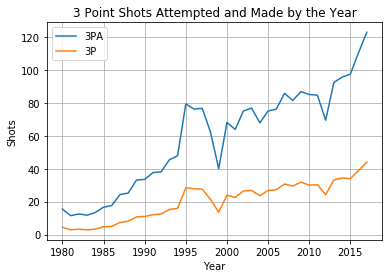

In [11]:
s =seasons.groupby('Year').mean()
ps = seasons.join(players.set_index('name'), on='Player')

psTall = ps.loc[ps['total_height'] >= 81].groupby('Year').mean()

threeA = s['3PA']
threeM = s['3P']
threeP = s['3P%']

threeAtall = psTall['3PA']
threeMtall = psTall['3P']
threePtall = psTall['3P%']

plt.plot(threeA.index, threeA)
plt.plot(threeM.index, threeM)

plt.grid()
plt.legend()

plt.title('3 Point Shots Attempted and Made by the Year')
plt.xlabel('Year')
plt.ylabel('Shots')

plt.savefig('images/3 Point Shots Attempted and Made by the Year', dpi = 100, bbox_inches='tight')

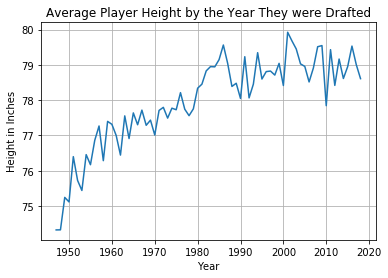

In [13]:


p = players.groupby('year_start').mean()
heightByYear = p['total_height']

short = players.sort_values(by = 'total_height', ascending = True).head(5)
tall = players.sort_values(by = 'total_height', ascending = False).head(5)



plt.grid()
plt.title('Average Player Height by the Year They were Drafted')
plt.xlabel('Year')
plt.ylabel('Height in Inches')

plt.plot(heightByYear.index,heightByYear)

plt.savefig('images/Average Player Height by the Year They were Drafted', dpi = 100, bbox_inches='tight')

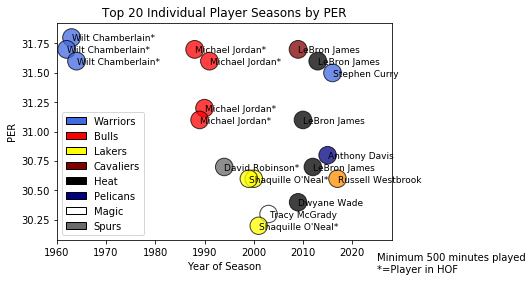

In [20]:
s = seasons.loc[seasons['MP'] >= 500,:]

s = s.groupby(by =['Player','Year']).mean()
s = s[['PER', '3P', 'MP','eFG%']]
playersByPER = s.sort_values(by = 'PER', ascending=False)
bestSeasons = playersByPER['PER'].head(20)

years = bestSeasons.index.get_level_values('Year')
players = bestSeasons.index.get_level_values('Player')

plt.title('Top 20 Individual Player Seasons by PER')
plt.ylabel('PER')
plt.xlabel('Year of Season')
plt.xlim(1960,2028)
plt.text(x=2025,y= 29.8,
         s='Minimum 500 minutes played\n*=Player in HOF')

leg_elts = [Patch(facecolor='royalblue', edgecolor='black',
                         label='Warriors'),
           Patch(facecolor='red', edgecolor='black',
                         label='Bulls'),
           Patch(facecolor='yellow', edgecolor='black',
                         label='Lakers'),
           Patch(facecolor='maroon', edgecolor='black',
                         label='Cavaliers'),
           Patch(facecolor='black', edgecolor='black',
                         label='Heat'),
           Patch(facecolor='navy', edgecolor='black',
                         label='Pelicans'),
           Patch(facecolor='white', edgecolor='black',
                         label='Magic'),
           Patch(facecolor='dimgrey', edgecolor='black',
                         label='Spurs')]
plt.legend(handles = leg_elts)


plt.scatter(years, bestSeasons, marker = 'o',
            facecolors= ['royalblue',
                'red',
                'maroon',
                'royalblue',
                'black',
                'red',
                'royalblue',
                'royalblue',
                'red',
                'red',
                'black',
                'navy',
                'black',
                'dimgrey',
                'darkorange',
                'yellow',
                'yellow',
                'black',
                'white',
                'yellow'], edgecolors="black",
            s=bestSeasons*10, alpha=0.75)


for i,type in enumerate(players):
    #removes one of the Shaquille O'Neal labels
    if i != 15:
        x = years[i]
        y = bestSeasons[i]
        plt.text(x+0.04, y-0.03, type, fontsize=9)

top20fig = plt.gcf()
plt.show()

top20fig.savefig('images/Top 20 Individual Player Seasons by PER', dpi = 100, bbox_inches='tight')

C:\Users\Mikey O\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


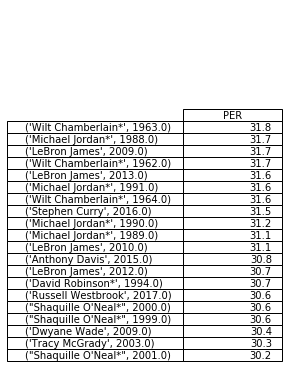

In [32]:


ax = plt.subplot(235, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, bestSeasons)  # where df is your data frame

plt.savefig('images/PERtable.png', dpi = 100, bbox_inches='tight')
plt.show()